In [4]:
#install.packages("dplyr",repos = "http://cran.us.r-project.org")
#install.packages("ggplot2",repos = "http://cran.us.r-project.org")
#install.packages("shiny",repos = "http://cran.us.r-project.org")
#install.packages("devtools",repos = "http://cran.us.r-project.org")
library(devtools)
install_github("StatsWithR/statsr",force = TRUE)

from URL https://api.github.com/repos/StatsWithR/statsr/zipball/master
Installing statsr
"C:/PROGRA~1/ANACON~1/R/bin/x64/R" --no-site-file --no-environ --no-save  \
  --no-restore --quiet CMD INSTALL  \
  "C:/Users/vikas/AppData/Local/Temp/RtmpwfTRMZ/devtools8e84d832604/StatsWithR-statsr-6f64cf2"  \
  --library="C:/Users/vikas/Documents/R/win-library/3.3" --install-tests 



In [8]:
library("statsr")

## The Arbuthnot data set
Refers to Dr. John Arbuthnot, an 18<sup>th</sup> century 
physician, writer, and mathematician. He was interested in the ratio of newborn
boys to newborn girls, so he gathered the baptism records for children born in
London for every year from 1629 to 1710.

In [10]:
data(arbuthnot)

In [13]:
head(arbuthnot)

year,boys,girls
1629,5218,4683
1630,4858,4457
1631,4422,4102
1632,4994,4590
1633,5158,4839
1634,5035,4820


**Q1.  How many variables are included in this data set? **

In [15]:
dim(arbuthnot)

[1] 82  3

In [17]:
names(arbuthnot)

[1] "year"  "boys"  "girls"

**Q2. What years are included in this dataset?**

In [26]:
arbuthnot$year

[1] 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641 1642 1643
[16] 1644 1645 1646 1647 1648 1649 1650 1651 1652 1653 1654 1655 1656 1657 1658
[31] 1659 1660 1661 1662 1663 1664 1665 1666 1667 1668 1669 1670 1671 1672 1673
[46] 1674 1675 1676 1677 1678 1679 1680 1681 1682 1683 1684 1685 1686 1687 1688
[61] 1689 1690 1691 1692 1693 1694 1695 1696 1697 1698 1699 1700 1701 1702 1703
[76] 1704 1705 1706 1707 1708 1709 1710

In [27]:
arbuthnot$boys

[1] 5218 4858 4422 4994 5158 5035 5106 4917 4703 5359 5366 5518 5470 5460 4793
[16] 4107 4047 3768 3796 3363 3079 2890 3231 3220 3196 3441 3655 3668 3396 3157
[31] 3209 3724 4748 5216 5411 6041 5114 4678 5616 6073 6506 6278 6449 6443 6073
[46] 6113 6058 6552 6423 6568 6247 6548 6822 6909 7577 7575 7484 7575 7737 7487
[61] 7604 7909 7662 7602 7676 6985 7263 7632 8062 8426 7911 7578 8102 8031 7765
[76] 6113 8366 7952 8379 8239 7840 7640

**Q3.What command would you use to extract just the counts of girls born? 
** 

In [29]:
sum(arbuthnot$girls)

[1] 453841

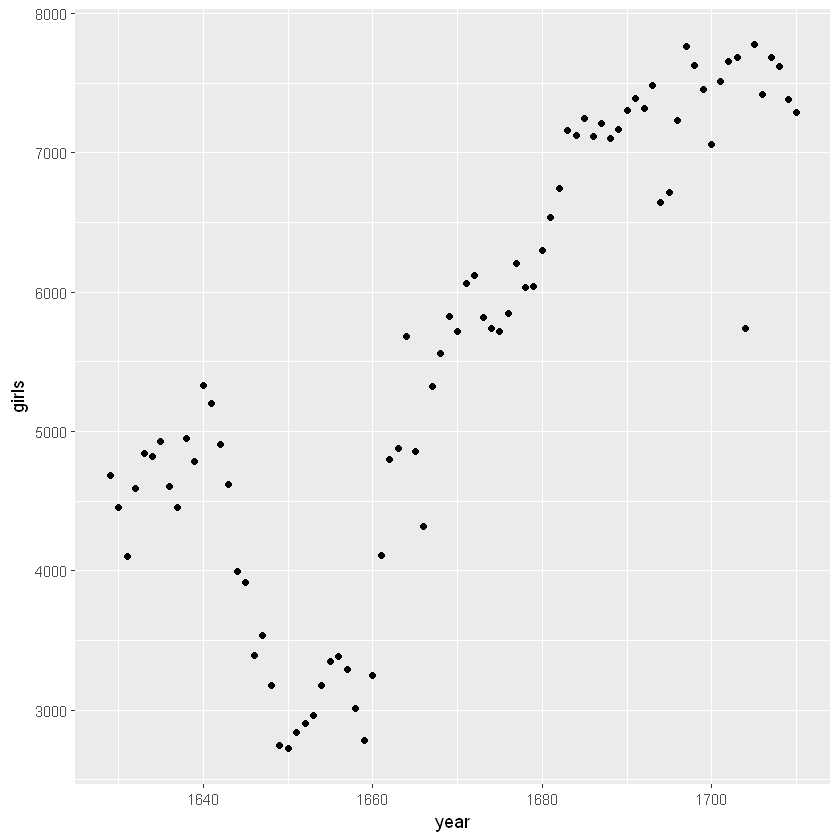

In [41]:
library(ggplot2)
ggplot(data = arbuthnot, aes(x = year, y = girls)) +
  geom_point()


#The first argument is always the dataset. 
#Next, we provide thevariables from the dataset to be assigned to `aes`thetic 
#elements of the plot, e.g. the x and the y axes. 
#Finally, we use another layer, separated by a `+` to specify the `geom`etric 
#object for the plot. Since we want to scatterplot, we use `geom_point`.

In [42]:
library(dplyr)
arbuthnot <- arbuthnot %>% 
                        mutate(total = boys + girls)
#`%>%` operator is called the **piping*,
#Basically, it takes the output of the current line and pipes it into 
#the following line of code

#"Take the `arbuthnot` dataset and **pipe** it into the `mutate` function. 
#Using this mutate a new variable called `total` that is the sum of the variables
#called `boys` and `girls`. Then assign this new resulting dataset to the object
#called `arbuthnot`, i.e. overwrite the old `arbuthnot` dataset with the new one
#containing the new variable."*

In [43]:
names(arbuthnot)

[1] "year"  "boys"  "girls" "total"

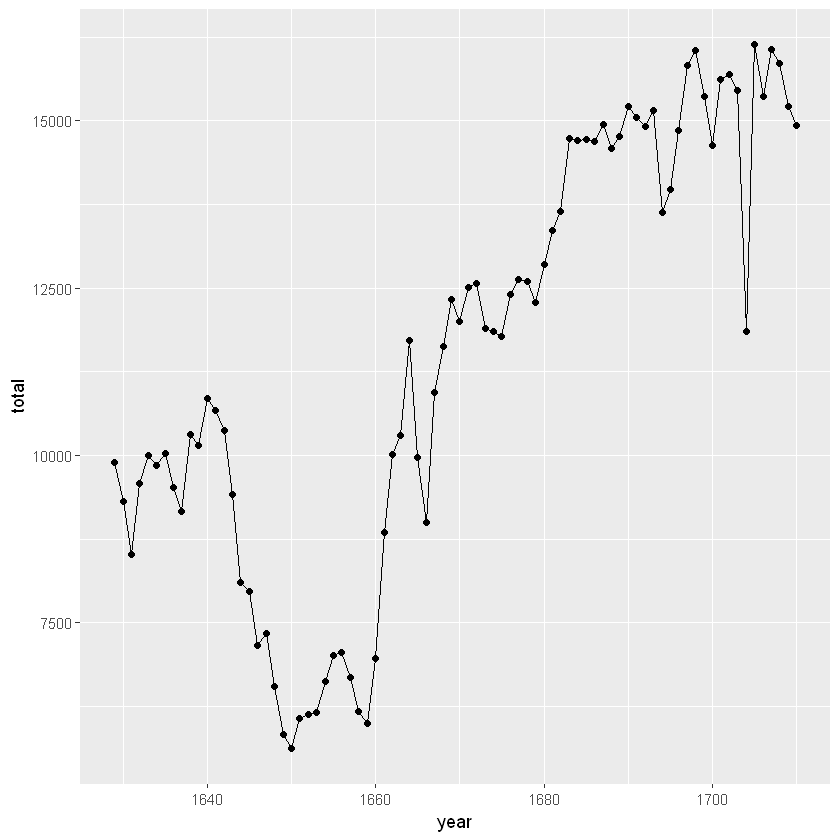

In [48]:
ggplot(data=arbuthnot, aes(x=year,y=total)) + geom_line() + geom_point()

Generate a plot of the proportion of boys born over time. What 
do you see? 

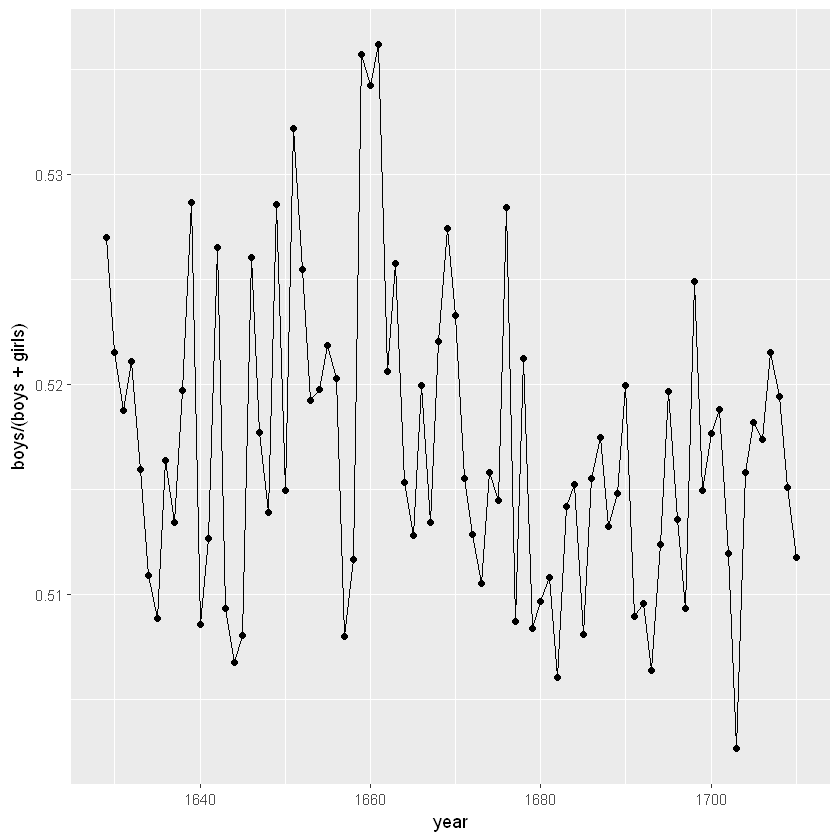

In [66]:
ggplot(data=arbuthnot,aes(x=year,y=boys/(boys+girls))) + geom_line() + geom_point()

In [54]:
arbuthnot <- arbuthnot %>% 
                mutate(more_boys=boys>girls)
#This command add a new variable to the `arbuthnot` data frame containing 
#the values of either `TRUE` if that year had more boys than girls, or `FALSE`

## Present day birth records in the United States

In [53]:
data(present)

In [56]:
dim(present)

[1] 74  3

In [61]:
head(present)

year,boys,girls
1940,1211684,1148715
1941,1289734,1223693
1942,1444365,1364631
1943,1508959,1427901
1944,1435301,1359499
1945,1404587,1330869


What years are included in this dataset? 

In [62]:
range(present$year)

[1] 1940 2013

1. Calculate the total number of births for each year and store these values in a new 
variable called `total` in the `present` dataset. Then, calculate the proportion of 
boys born each year and store these values in a new variable called `prop_boys` in 
the same dataset. Plot these values over time and based on the plot determine if the 
following statement is true or false: The proportion of boys born in the US has 
decreased over time. 

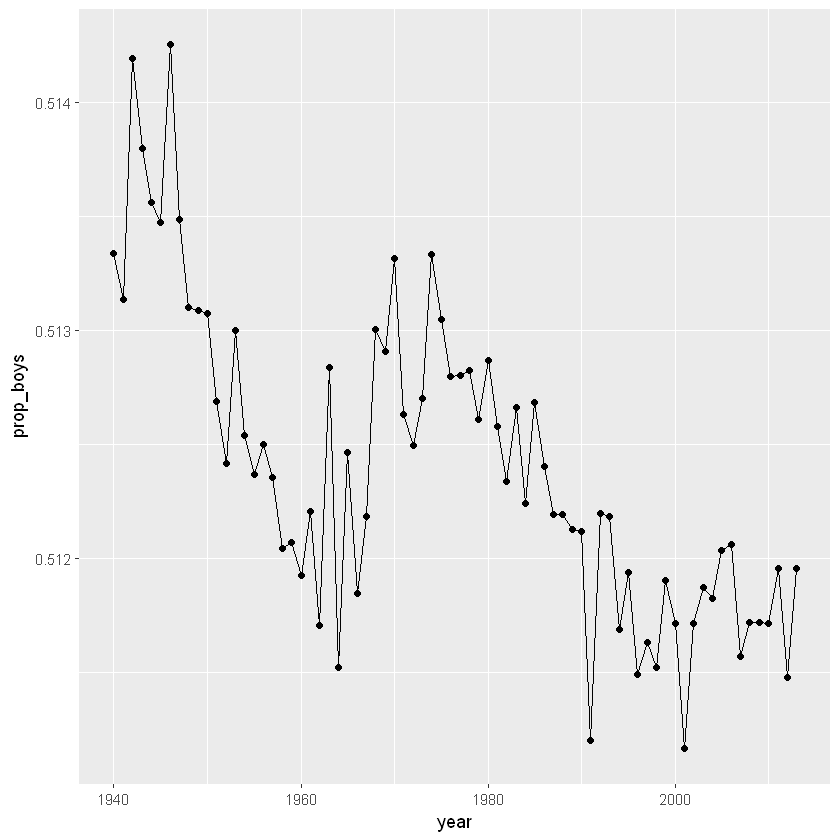

In [72]:
present <-  present %>%
                mutate(prop_boys=boys/(boys+girls))
ggplot(data=present,aes(x=year,y=prop_boys)) +geom_point() +geom_line()

Q. Create a new variable called `more_boys` which contains the value of either `TRUE` 
if that year had more boys than girls, or `FALSE` if that year did not. Based on this 
variable which of the following statements is true? 

<ol>
<li> Every year there are more girls born than boys. </li>
<li> Every year there are more boys born than girls. </li>
<li> Half of the years there are more boys born, and the other half more girls born. </li>
</ol>

In [70]:
present <-  present %>% 
                mutate(more_boys=boys>girls)
present$more_boys

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

year,boys,girls,prop_boys,more_boys,diff
1940,1211684,1148715,0.5133386,TRUE,62969
1941,1289734,1223693,0.5131376,TRUE,66041
1942,1444365,1364631,0.5141926,TRUE,79734
1943,1508959,1427901,0.5138001,TRUE,81058
1944,1435301,1359499,0.5135613,TRUE,75802
1945,1404587,1330869,0.5134745,TRUE,73718


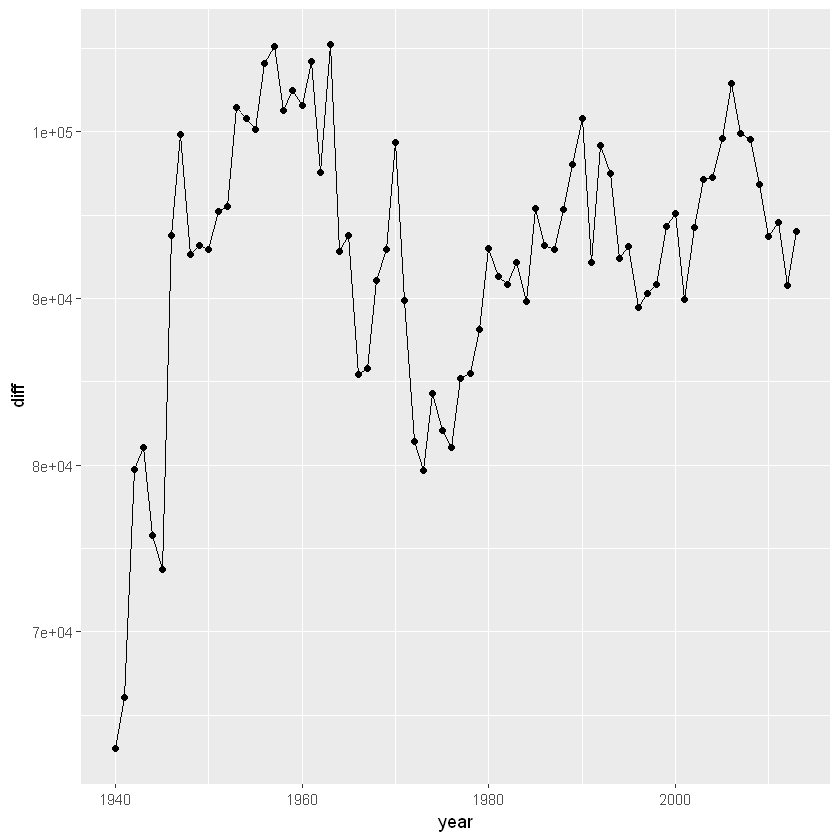

In [76]:
present <-  present %>% 
                mutate(diff=boys-girls)
head(present)

ggplot(data=present,aes(x=year,y=diff)) +geom_point() +geom_line()

Q. Calculate the boy-to-girl ratio each year, and store these values in a new variable called `prop_boy_girl` in the `present` dataset. Plot these values over time. Which of the following best describes the trend? 
<ol>
<li> There appears to be no trend in the boy-to-girl ratio from 1940 to 2013. </li>
<li> There is initially an increase in boy-to-girl ratio, which peaks around 1960. After 1960 there is a decrease in the boy-to-girl ratio, but the number begins to increase in the mid 1970s. </li>
<li> There is initially a decrease in the boy-to-girl ratio, and then an increase between 1960 and 1970, followed by a decrease. </li>
<li> The boy-to-girl ratio has increased over time. </li>
<li> There is an initial decrease in the boy-to-girl ratio born but this number appears to level around 1960 and remain constant since then. </li>
</ol>

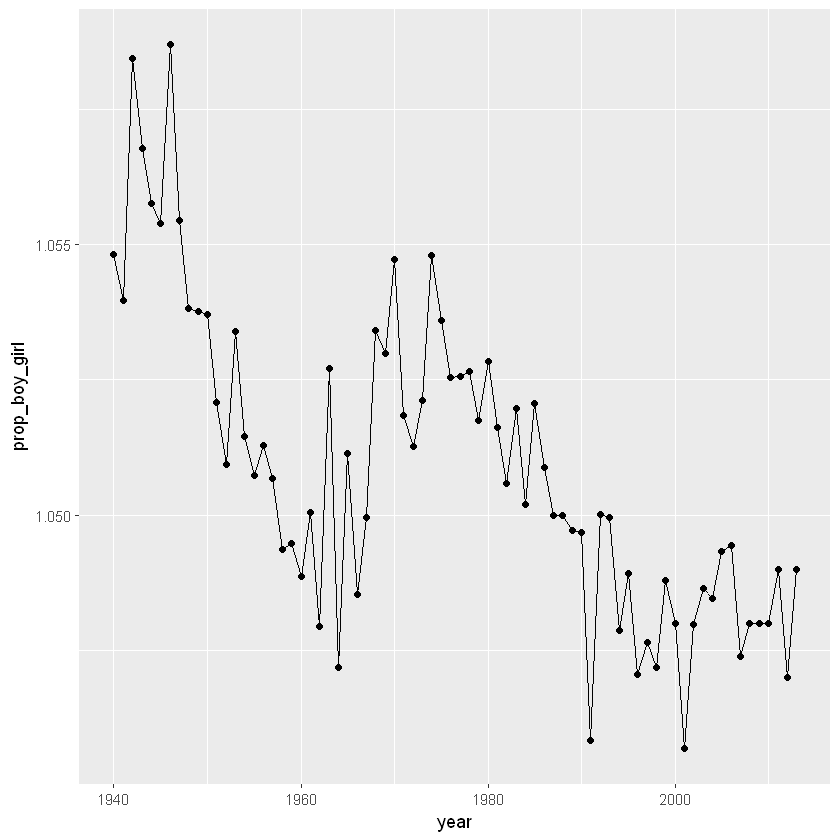

In [79]:
present <- present %>% 
                mutate(prop_boy_girl=boys/girls)
ggplot(data=present,aes(x=year,y=prop_boy_girl))+geom_line()+geom_point()

Q. In what year did we see the most total number of births in the U.S.? *Hint:* Sort 
your dataset in descending order based on the `total` column. You can do this 
interactively in the data viewer by clicking on the arrows next to the variable 
names. Or to arrange the data in a descenting order with new function: `descr` (for 
descending order).
<ol>
<li> 1940 </li>
<li> 1957 </li>
<li> 1961 </li>
<li> 1991 </li>
<li> 2007 </li>
</ol>

In [80]:
present %>%
        mutate(total = girls+boys) %>%
        arrange(desc(total))

year,boys,girls,prop_boys,more_boys,diff,prop_boy_girl,total
2007,2208071,2108162,0.5115736,TRUE,99909,1.047392,4316233
1961,2186274,2082052,0.5122088,TRUE,104222,1.050057,4268326
2006,2184237,2081318,0.5120640,TRUE,102919,1.049449,4265555
1960,2179708,2078142,0.5119269,TRUE,101566,1.048873,4257850
1957,2179960,2074824,0.5123550,TRUE,105136,1.050672,4254784
2008,2173625,2074069,0.5117188,TRUE,99556,1.048000,4247694
1959,2173638,2071158,0.5120713,TRUE,102480,1.049480,4244796
1958,2152546,2051266,0.5120462,TRUE,101280,1.049374,4203812
1962,2132466,2034896,0.5117064,TRUE,97570,1.047948,4167362
1956,2133588,2029502,0.5125011,TRUE,104086,1.051286,4163090
